<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-interactions-from-PDB-RNA-ligands-dataset" data-toc-modified-id="Analysis-of-interactions-from-PDB-RNA-ligands-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of interactions from PDB RNA-ligands dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Remove-non-standard-residues" data-toc-modified-id="Remove-non-standard-residues-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Remove non standard residues</a></span></li></ul></li><li><span><a href="#Histogram-of-distances" data-toc-modified-id="Histogram-of-distances-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Histogram of distances</a></span><ul class="toc-item"><li><span><a href="#Skewness-and-Kurtosis" data-toc-modified-id="Skewness-and-Kurtosis-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Skewness and Kurtosis</a></span></li></ul></li><li><span><a href="#Preferred-RNA-atoms-for-various-interactions" data-toc-modified-id="Preferred-RNA-atoms-for-various-interactions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preferred RNA atoms for various interactions</a></span><ul class="toc-item"><li><span><a href="#overall-atoms-statistics-for-all-bases" data-toc-modified-id="overall-atoms-statistics-for-all-bases-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>overall atoms statistics for all bases</a></span><ul class="toc-item"><li><span><a href="#HB" data-toc-modified-id="HB-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>HB</a></span></li><li><span><a href="#Lipo" data-toc-modified-id="Lipo-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Lipo</a></span></li><li><span><a href="#Pi-anion" data-toc-modified-id="Pi-anion-1.2.1.3"><span class="toc-item-num">1.2.1.3&nbsp;&nbsp;</span>Pi-anion</a></span></li><li><span><a href="#Halogen-bonds" data-toc-modified-id="Halogen-bonds-1.2.1.4"><span class="toc-item-num">1.2.1.4&nbsp;&nbsp;</span>Halogen bonds</a></span></li><li><span><a href="#All-bonds" data-toc-modified-id="All-bonds-1.2.1.5"><span class="toc-item-num">1.2.1.5&nbsp;&nbsp;</span>All bonds</a></span></li></ul></li></ul></li><li><span><a href="#Statistics-of-interactions---tables" data-toc-modified-id="Statistics-of-interactions---tables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Statistics of interactions - tables</a></span><ul class="toc-item"><li><span><a href="#Data-for-proteins" data-toc-modified-id="Data-for-proteins-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Data for proteins</a></span></li></ul></li><li><span><a href="#number-of-structures-with-the-given-interaction" data-toc-modified-id="number-of-structures-with-the-given-interaction-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>number of structures with the given interaction</a></span><ul class="toc-item"><li><span><a href="#Structures-with-ions-and-water" data-toc-modified-id="Structures-with-ions-and-water-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Structures with ions and water</a></span></li><li><span><a href="#Data-for-RNA-from-Pedroni" data-toc-modified-id="Data-for-RNA-from-Pedroni-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Data for RNA from Pedroni</a></span></li></ul></li><li><span><a href="#Combo---all-four-plots-in-one" data-toc-modified-id="Combo---all-four-plots-in-one-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Combo - all four plots in one</a></span></li><li><span><a href="#Wrapper-compatible-stats" data-toc-modified-id="Wrapper-compatible-stats-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Wrapper-compatible stats</a></span></li></ul></li><li><span><a href="#Ligands-features-vs-interactions" data-toc-modified-id="Ligands-features-vs-interactions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ligands features vs interactions</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Stats-for-ligands" data-toc-modified-id="Stats-for-ligands-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Stats for ligands</a></span></li></ul></li><li><span><a href="#number-of-structures-with-a-given-descriptor-value" data-toc-modified-id="number-of-structures-with-a-given-descriptor-value-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>number of structures with a given descriptor value</a></span></li></ul></li><li><span><a href="#Generate-script-for-PyMOL-to-visualize-these-data" data-toc-modified-id="Generate-script-for-PyMOL-to-visualize-these-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generate script for PyMOL to visualize these data</a></span></li></ul></div>

# Analysis of interactions from PDB RNA-ligands dataset

In [1]:
# python prerequisities

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
%config Completer.use_jedi = False

sns.set(font_scale=2, style="ticks", rc={"axes.titlesize":24,"axes.labelsize":20, 'xtick.labelsize': 20, 'ytick.labelsize': 20})

In [2]:
imgSubDir = "hi-res-images/" # directory for image output

In [3]:
# let's read the detailed interactions data

# generate it with SUMMARY/generate-full-data-file.sh

fulldata = pd.read_csv("SIFs_outputs/SUMMARY/DETAILED-all-data.tsv",
                       delimiter="\t",
                      index_col=0)  # header=None


## if we want to deduplicate the data
## eg., for Hydrogen bonds - if for the same interacting points we have the same type of interaction,
## fulldata.drop_duplicates(inplace=True)

fulldata.head(5)

,Ligand_name,Ligand_pose,Ligand_occurrence_in_sdf,Interaction,Ligand_Atom,Ligand_X,Ligand_Y,Ligand_Z,Receptor_Residue_Name,Receptor_Number,Receptor_Chain,Receptor_Atom,Receptor_X,Receptor_Y,Receptor_Z,Distance,PDB,LigandNumber
0,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
1,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
2,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
3,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
4,1AJU,1,1,HB,8,-4.054,-2.296,-1.685,A,22,A,N7,-4.333,0.639,-0.874,3.05774,1AJU,1


In [4]:
# for the initial dataset. All interactions counted, including those formed multiple time to the given residue
fulldata.groupby('Interaction')['Ligand_name'].count()

Interaction
CA                 904
HAL                  6
HB                5063
Ion-mediated       214
Lipophilic        3609
Pi_Anion            28
Pi_Cation           97
Pi_Stacking        146
Water-mediated     302
Name: Ligand_name, dtype: int64

### Remove non standard residues

In [5]:
# distanceData.groupby(['Receptor_Residue_Name']).count()['Ligand_name'].index
# ['1MA', '5BU', '5MU', '7MG', 'A', 'C', 'DA', 'DC', 'G', 'HOH', 'K', 'MG',
#        'MN', 'OMG', 'OMU', 'PB', 'PSU', 'SR', 'U', 'UR3'],

nonStandard = ['1MA', '5BU', '5MU', '7MG', 'DA', 'DC', 'OMG', 'OMU', 'PSU', 'SR', 'UR3']

# remove those defined as non standard
fulldata2 = fulldata[~fulldata['Receptor_Residue_Name'].isin(nonStandard)]

fulldata2

,Ligand_name,Ligand_pose,Ligand_occurrence_in_sdf,Interaction,Ligand_Atom,Ligand_X,Ligand_Y,Ligand_Z,Receptor_Residue_Name,Receptor_Number,Receptor_Chain,Receptor_Atom,Receptor_X,Receptor_Y,Receptor_Z,Distance,PDB,LigandNumber
0,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
1,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
2,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
3,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
4,1AJU,1,1,HB,8,-4.054,-2.296,-1.685,A,22,A,N7,-4.333,0.639,-0.874,3.05774,1AJU,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,4V8F,1,1,HB,4,3.951,210.818,13.180,U,1495,B,O4,3.359,213.771,12.488,3.09023,4V8F,1
57,4V8F,1,1,HB,4,3.951,210.818,13.180,U,1495,B,O4,3.359,213.771,12.488,3.09023,4V8F,1
58,4V8F,1,1,HB,4,3.951,210.818,13.180,C,1496,B,N4,3.733,211.846,9.460,3.86558,4V8F,1
59,4V8F,1,1,HB,4,3.951,210.818,13.180,C,1496,B,N4,3.733,211.846,9.460,3.86558,4V8F,1


In [6]:
# keep only data we need

distanceData = fulldata2[['PDB', 'Ligand_name', 'Interaction', 'Distance', 'Receptor_Atom', 'Receptor_Residue_Name']]

distanceData.head(5)

,PDB,Ligand_name,Interaction,Distance,Receptor_Atom,Receptor_Residue_Name
0,1AJU,1AJU,HB,3.31267,O3',A
1,1AJU,1AJU,HB,3.31267,O3',A
2,1AJU,1AJU,HB,3.21237,N3,A
3,1AJU,1AJU,HB,3.21237,N3,A
4,1AJU,1AJU,HB,3.05774,N7,A


In [7]:
# dictionary of a human-friendly names of interactions

interactionDesc = {}
interactionDesc['Pi_Stacking'] = "Pi-stacking"
interactionDesc['Pi_Cation'] = "Pi-cation"
interactionDesc['HB'] = "Hydrogen bond"
interactionDesc['CA'] = "Cation-anion"
interactionDesc['Pi_Anion'] = "Pi-anion"
interactionDesc['HAL'] = "Halogen bond"
interactionDesc['Lipophilic'] = "Lipophilic"
interactionDesc['Water-mediated'] = "Water-mediated"
interactionDesc['Ion-mediated'] = "Ion-mediated"
# interactionDesc[''] = ""
# interactionDesc[''] = ""


# dictionary of a human friendly name of ions and other

ionsDict = {}

ionsDict['K'] = 'K ion'
ionsDict['MG'] = 'Mg ion'
# ionsDict['MN'] = ''
# ionsDict['PB'] = ''
# ionsDict['SR'] = ''

In [8]:
distanceData.groupby(['Receptor_Residue_Name']).count()

,PDB,Ligand_name,Interaction,Distance,Receptor_Atom
Receptor_Residue_Name,,,,,
A,2427,2427,2427,2427,2427
C,2052,2052,2052,2052,2052
G,4086,4086,4086,4086,4086
HOH,151,151,151,151,151
K,64,64,64,64,64
MG,36,36,36,36,36
MN,2,2,2,2,2
PB,1,1,1,1,1
U,1476,1476,1476,1476,1476


In [9]:
# friendly names for interactions

distanceData['Interaction'] = distanceData['Interaction'].replace(interactionDesc)

distanceData['Receptor_Residue_Name'] = distanceData['Receptor_Residue_Name'].replace(ionsDict)

distanceData.head(4)

<ipython-input-9-d01bbb5cbcc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distanceData['Interaction'] = distanceData['Interaction'].replace(interactionDesc)
<ipython-input-9-d01bbb5cbcc1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distanceData['Receptor_Residue_Name'] = distanceData['Receptor_Residue_Name'].replace(ionsDict)


,PDB,Ligand_name,Interaction,Distance,Receptor_Atom,Receptor_Residue_Name
0,1AJU,1AJU,Hydrogen bond,3.31267,O3',A
1,1AJU,1AJU,Hydrogen bond,3.31267,O3',A
2,1AJU,1AJU,Hydrogen bond,3.21237,N3,A
3,1AJU,1AJU,Hydrogen bond,3.21237,N3,A


In [10]:
# not-so-quick and dirty hack to rename ionic interactions

columns = [
    'PDB', 'Ligand_name', 'Interaction', 'Distance', 'Receptor_Atom', 'Receptor_Residue_Name',
    'Interaction2'
]


distanceData2 = pd.DataFrame(
    data=None,
    columns=columns,
)

for index, row in distanceData.iterrows():  #.itertuples():
    if row['Interaction'] == interactionDesc['Ion-mediated']:
        if len(row['Ligand_name']) >= 4:
            # normal ligand, not HOH or ion
            # Ligand <-> ion
            row['Interaction2'] = interactionDesc['Ion-mediated'] + " (" + row[
            'Receptor_Residue_Name'] + "): ligand-ion"
        else:
            # ion or HOH
            # ion <-> RNA
            row['Interaction2'] = interactionDesc['Ion-mediated'] + " (" + row[
            'Ligand_name'] + " ion): ion-RNA"
                
    elif row['Interaction'] == interactionDesc['Water-mediated']:
        if len(row['Ligand_name']) >= 4:
            # normal ligand, not HOH or ion
            # Ligand <-> hoh
            row['Interaction2'] = interactionDesc['Water-mediated'] + ": ligand-water"
        else:
            # hoh <-> RNA
            row['Interaction2'] = interactionDesc['Water-mediated'] + ": water-RNA"
          

    else:
        row['Interaction2'] = row['Interaction']
            
    distanceData2.loc[len(distanceData2)] = row

distanceData2

,PDB,Ligand_name,Interaction,Distance,Receptor_Atom,Receptor_Residue_Name,Interaction2
0,1AJU,1AJU,Hydrogen bond,3.31267,O3',A,Hydrogen bond
1,1AJU,1AJU,Hydrogen bond,3.31267,O3',A,Hydrogen bond
2,1AJU,1AJU,Hydrogen bond,3.21237,N3,A,Hydrogen bond
3,1AJU,1AJU,Hydrogen bond,3.21237,N3,A,Hydrogen bond
4,1AJU,1AJU,Hydrogen bond,3.05774,N7,A,Hydrogen bond
...,...,...,...,...,...,...,...
10290,4V8F,4V8F,Hydrogen bond,3.09023,O4,U,Hydrogen bond
10291,4V8F,4V8F,Hydrogen bond,3.09023,O4,U,Hydrogen bond
10292,4V8F,4V8F,Hydrogen bond,3.86558,N4,C,Hydrogen bond
10293,4V8F,4V8F,Hydrogen bond,3.86558,N4,C,Hydrogen bond


In [11]:
distanceData2[distanceData2['Interaction'] == interactionDesc['Ion-mediated']]

,PDB,Ligand_name,Interaction,Distance,Receptor_Atom,Receptor_Residue_Name,Interaction2
482,1F27,1F27,Ion-mediated,2.06075,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion
483,1F27,MG,Ion-mediated,1.99300,OP2,A,Ion-mediated (MG ion): ion-RNA
751,1HNW,1HNW,Ion-mediated,2.05800,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion
752,1HNW,MG,Ion-mediated,2.93710,O5',C,Ion-mediated (MG ion): ion-RNA
753,1HNW,1HNW,Ion-mediated,2.05800,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion
...,...,...,...,...,...,...,...
8875,3SKR,MG,Ion-mediated,3.07730,OP2,A,Ion-mediated (MG ion): ion-RNA
10098,4V8A,4V8A,Ion-mediated,1.57770,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion
10099,4V8A,MG,Ion-mediated,2.89160,O3',A,Ion-mediated (MG ion): ion-RNA
10119,4V8A,4V8A,Ion-mediated,1.57770,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion


In [12]:
# remove unnecesary columns and rename it again
distanceData3 = distanceData2.drop(['Interaction'], axis=1).rename(columns={'Interaction2': 'Interaction'})

distanceData3

,PDB,Ligand_name,Distance,Receptor_Atom,Receptor_Residue_Name,Interaction
0,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
1,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
2,1AJU,1AJU,3.21237,N3,A,Hydrogen bond
3,1AJU,1AJU,3.21237,N3,A,Hydrogen bond
4,1AJU,1AJU,3.05774,N7,A,Hydrogen bond
...,...,...,...,...,...,...
10290,4V8F,4V8F,3.09023,O4,U,Hydrogen bond
10291,4V8F,4V8F,3.09023,O4,U,Hydrogen bond
10292,4V8F,4V8F,3.86558,N4,C,Hydrogen bond
10293,4V8F,4V8F,3.86558,N4,C,Hydrogen bond


## Histogram of distances

- ⚠️ here we will use ONLY canonical bases (A C G U)

In [13]:
# Let's remove unfrequent residues

desiredReceptorNames = ['A', 'C', 'G', 'U', 'Mg ion', 'K ion', 'Na ion', 'HOH']

distanceData4 = distanceData3[distanceData3['Receptor_Residue_Name'].isin(desiredReceptorNames)]

distanceData4.head(5)

,PDB,Ligand_name,Distance,Receptor_Atom,Receptor_Residue_Name,Interaction
0,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
1,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
2,1AJU,1AJU,3.21237,N3,A,Hydrogen bond
3,1AJU,1AJU,3.21237,N3,A,Hydrogen bond
4,1AJU,1AJU,3.05774,N7,A,Hydrogen bond


In [14]:
# data summary
# partners of RNA

distanceData4.groupby(['Receptor_Residue_Name']).count()

,PDB,Ligand_name,Distance,Receptor_Atom,Interaction
Receptor_Residue_Name,,,,,
A,2427,2427,2427,2427,2427
C,2052,2052,2052,2052,2052
G,4086,4086,4086,4086,4086
HOH,151,151,151,151,151
K ion,64,64,64,64,64
Mg ion,36,36,36,36,36
U,1476,1476,1476,1476,1476


In [15]:
# data summary
# interactions detected

distanceData4.groupby(['Interaction'])['Distance'].describe().sort_values(by='count', ascending=False)

# lack of "symmetry" in ion-rna and ligand-ion (for MN and PB) resulting from removing modified residues earlier.

,count,mean,std,min,25%,50%,75%,max
Interaction,,,,,,,,
Hydrogen bond,5026.0,3.267559,0.415372,1.19585,2.912950,3.313600,3.637093,3.89943
Lipophilic,3582.0,3.528625,0.536733,1.33450,3.460725,3.693000,3.853450,3.99950
Cation-anion,899.0,4.323543,0.889922,2.42695,3.632100,4.603660,5.068630,5.49970
Water-mediated: ligand-water,151.0,2.844711,0.220643,2.03483,2.727780,2.863090,2.925830,3.39636
Water-mediated: water-RNA,151.0,2.976321,0.269733,2.30180,2.765100,2.945500,3.241150,3.48020
Pi-stacking,146.0,3.868544,0.409878,3.29114,3.606922,3.773750,4.033980,5.42357
Pi-cation,96.0,4.781580,0.685639,3.03880,4.470957,4.781740,5.315785,5.98758
Ion-mediated (K ion): ion-RNA,64.0,3.169092,0.307378,2.42790,3.010000,3.121950,3.315475,3.88770
Ion-mediated (K ion): ligand-ion,64.0,3.000108,0.277599,2.73901,2.801180,2.850705,3.240330,3.58197


In [16]:
# data of min-max distances to plot on the histograms
# taken directly from config.py

MIN_DIST = 0.5 # Minimum atoms distance
MAX_HB_DIST = 3.9 # Maximum Donor-Acceptor distance in Hydrogen Bond
MAX_HAL_DIST = 4.0 # Maximum Donor-Acceptor distance in Halogen Bond
MAX_CA_DIST = 5.5 # Maximum cation-anion distance in electrostatic interaction
PI_ION_DISTANCE = 6.0 # Maximum cation/anion - aromatic ring center distance
RING_RING_MAX = 5.5 # Aromatic rings' centroids maximum distance

MAX_ION_DIST = 3.9 # Maximum ligand's nitrogen/oxygen/sulphur atom - positively charged ion or residue's nitrogen/oxygen atom - positively charged ion distance
MAX_MAGNESIUM_DIST = 3.2 # Maximum ligand's nitrogen/oxygen/sulphur atom - magnesium or residue's nitrogen/oxygen atom - magnesium distance (Zheng et al., 2015)
MAX_POTASSIUM_DIST = 3.9 # Maximum ligand's nitrogen/oxygen/sulphur atom - potassium or residue's nitrogen/oxygen atom - potassium distance (Zheng et al., 2008)
MAX_SODIUM_DIST = 3.6 # Maximum ligand's nitrogen/oxygen/sulphur atom - sodium or residue's nitrogen/oxygen atom - sodium distance (Zheng et al., 2008)
MAX_OTHER_ION_DIST = 3.5 # Maximum ligand's nitrogen/oxygen/sulphur atom - other than magnesium/potassium/sodium ion or residue's nitrogen/oxygen atom - other than magnesium/potassium/sodium ion distance (Zheng et al., 2008)
MAX_WATER_DIST = 3.5 # Maximum ligand's hydrogen donors/acceptors - water molecule (oxygen) or nucleic acid's hydrogen donors/acceptors - water molecule (oxygen) distance (Poornima & Dean, 1995)
MAX_LIPOHILIC_DIST = 4.0 # Maximum ligand - residue lipophilic contact distance (Padroni et al., 2020)


interactionDistances = {}
interactionDistances['Hydrogen bond'] = MAX_HB_DIST
interactionDistances['Cation-anion'] = MAX_CA_DIST
interactionDistances['Halogen bond'] = MAX_HAL_DIST
interactionDistances['Lipophilic'] = MAX_LIPOHILIC_DIST
interactionDistances['Pi-stacking'] = RING_RING_MAX
interactionDistances['Pi-cation'] = PI_ION_DISTANCE
interactionDistances['Pi-anion'] = PI_ION_DISTANCE
interactionDistances['Water-mediated: ligand-water'] = MAX_WATER_DIST
interactionDistances['Water-mediated: water-RNA'] = MAX_WATER_DIST
interactionDistances['Ion-mediated (K ion): ion-RNA'] = MAX_POTASSIUM_DIST
interactionDistances['Ion-mediated (K ion): ligand-ion'] = MAX_POTASSIUM_DIST
interactionDistances['Ion-mediated (Mg ion): ligand-ion'] = MAX_MAGNESIUM_DIST
interactionDistances['Ion-mediated (MG ion): ion-RNA'] = MAX_MAGNESIUM_DIST


In [17]:
# list of interactions
distanceData4.groupby(['Interaction'])['Distance'].count().sort_values(ascending=False).index

Index(['Hydrogen bond', 'Lipophilic', 'Cation-anion',
       'Water-mediated: ligand-water', 'Water-mediated: water-RNA',
       'Pi-stacking', 'Pi-cation', 'Ion-mediated (K ion): ion-RNA',
       'Ion-mediated (K ion): ligand-ion', 'Ion-mediated (MG ion): ion-RNA',
       'Ion-mediated (Mg ion): ligand-ion', 'Pi-anion', 'Halogen bond',
       'Ion-mediated (SR ion): ion-RNA', 'Ion-mediated (MN ion): ion-RNA',
       'Ion-mediated (PB ion): ion-RNA'],
      dtype='object', name='Interaction')

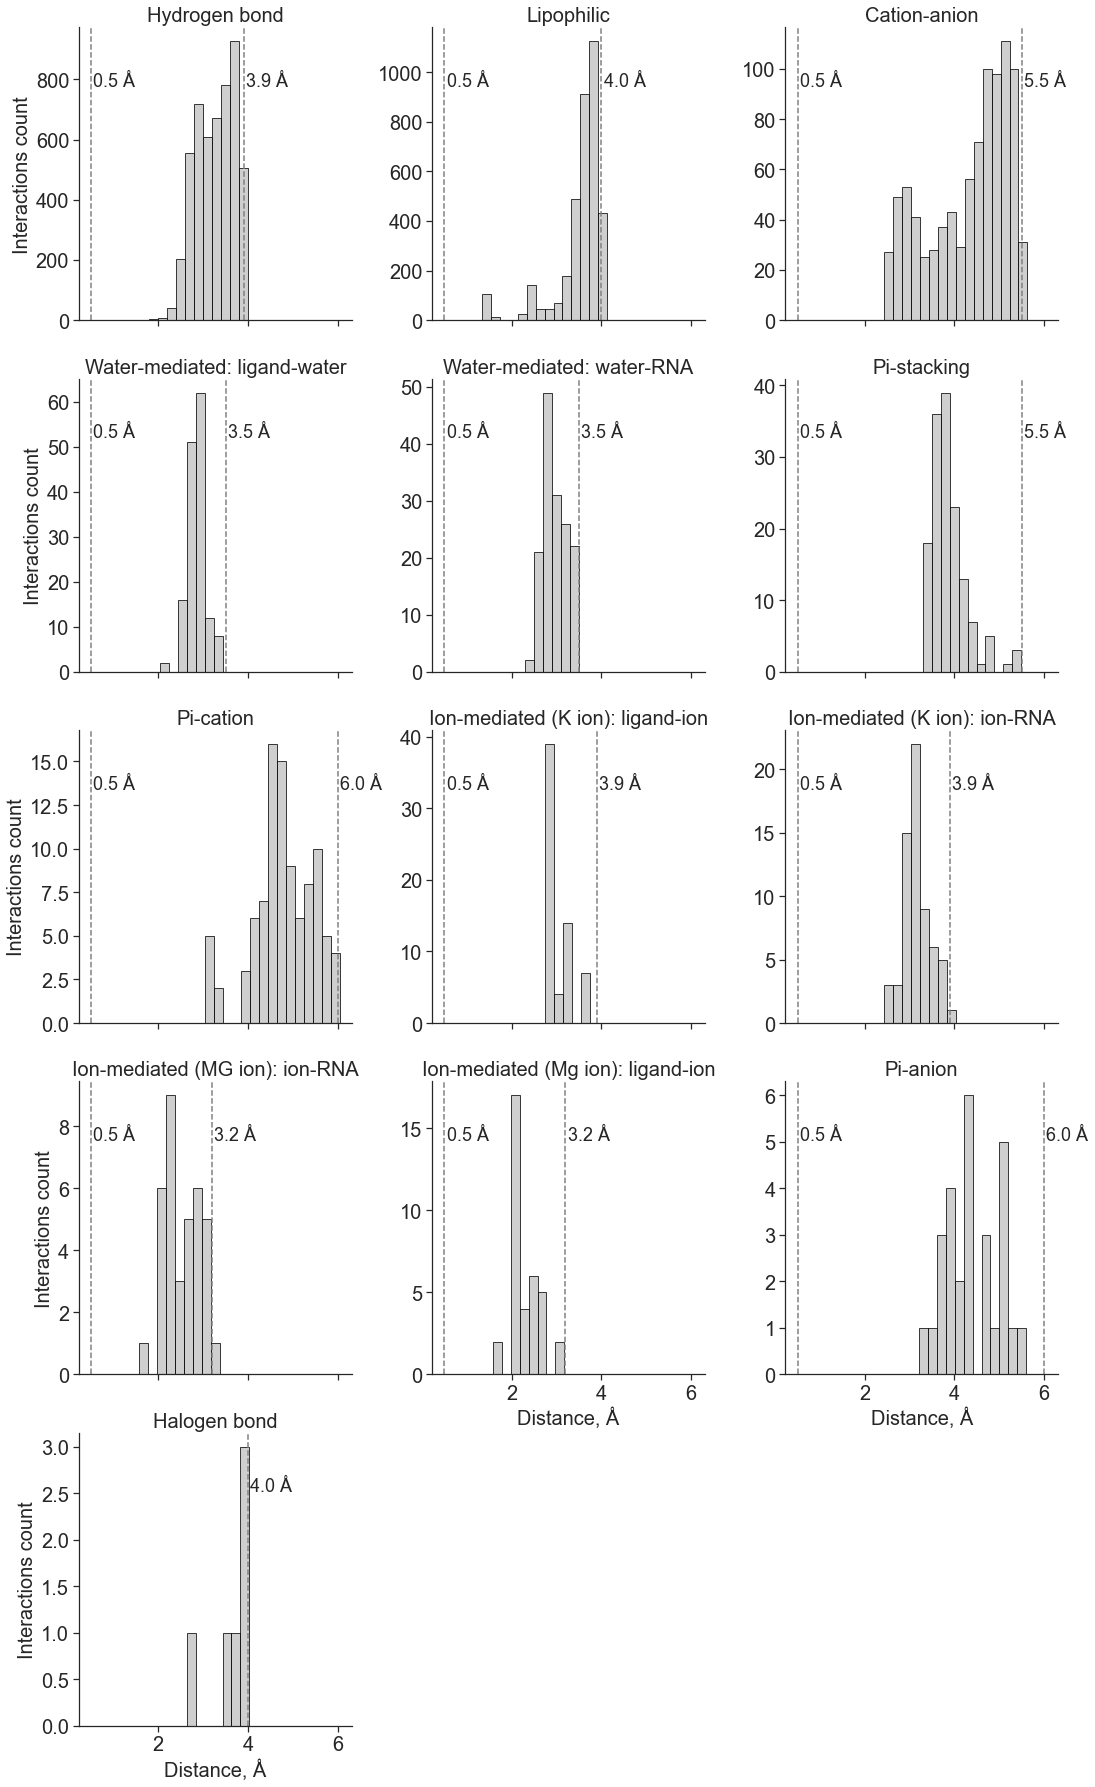

In [18]:
dataOrder = [
    'Hydrogen bond', 'Lipophilic', 'Cation-anion', 
    'Water-mediated: ligand-water', 'Water-mediated: water-RNA',
    'Pi-stacking', 
    'Pi-cation', 'Ion-mediated (K ion): ligand-ion',
       'Ion-mediated (K ion): ion-RNA', 'Ion-mediated (MG ion): ion-RNA',
       'Ion-mediated (Mg ion): ligand-ion', 'Pi-anion', 'Halogen bond',]

binwidth=0.2

def plotBoundary(axNo, value):
    ax = g.axes[axNo]
    ax.axvline(value, ls='--', color="gray")
    ax.text(value + 0.05,
            0.8 * ax.get_ylim()[1],
            "%.1f Å" % (value),
            fontsize=18)


g = sns.FacetGrid(distanceData4,
                  col="Interaction",
                  sharey=False,
                  col_wrap=3,
                  col_order = dataOrder,
                  height=5)
g.map_dataframe(sns.histplot,
                x="Distance",
                binwidth=binwidth,
                color='silver',
                edgecolor="black",
                linewidth=0.75)
# g.map_dataframe(sns.kdeplot,
#                 x="Distance",
#                 color='black', common_grid=False,
#                 linewidth=0.75)

g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

g.set_axis_labels("Distance, Å", "Interactions count")

# lets draw vertical lines for min and max cutoff distances:
plotBoundary(0, MAX_HB_DIST)
plotBoundary(1, MAX_LIPOHILIC_DIST)
plotBoundary(2, MAX_CA_DIST)

plotBoundary(3, MAX_WATER_DIST)
plotBoundary(4, MAX_WATER_DIST)
plotBoundary(5, RING_RING_MAX)

plotBoundary(6, PI_ION_DISTANCE)
plotBoundary(7, MAX_POTASSIUM_DIST)
plotBoundary(8, MAX_POTASSIUM_DIST)

plotBoundary(9, MAX_MAGNESIUM_DIST)
plotBoundary(10, MAX_MAGNESIUM_DIST)
plotBoundary(11, PI_ION_DISTANCE)

plotBoundary(12, MAX_HAL_DIST)



for i in range(0, 12):
    plotBoundary(i, MIN_DIST)

plt.savefig(imgSubDir + "histograms.png", dpi=600, bbox_inches="tight")

In [19]:
# select only most frequent interactions

mostFrequentInteractions = [
    'Hydrogen bond', 'Lipophilic', 'Cation-anion', 'Pi-stacking', 
    ]

distanceData4mostFrequent = distanceData4[distanceData4['Interaction'].isin(mostFrequentInteractions)]


<AxesSubplot:xlabel='Distance', ylabel='Density'>

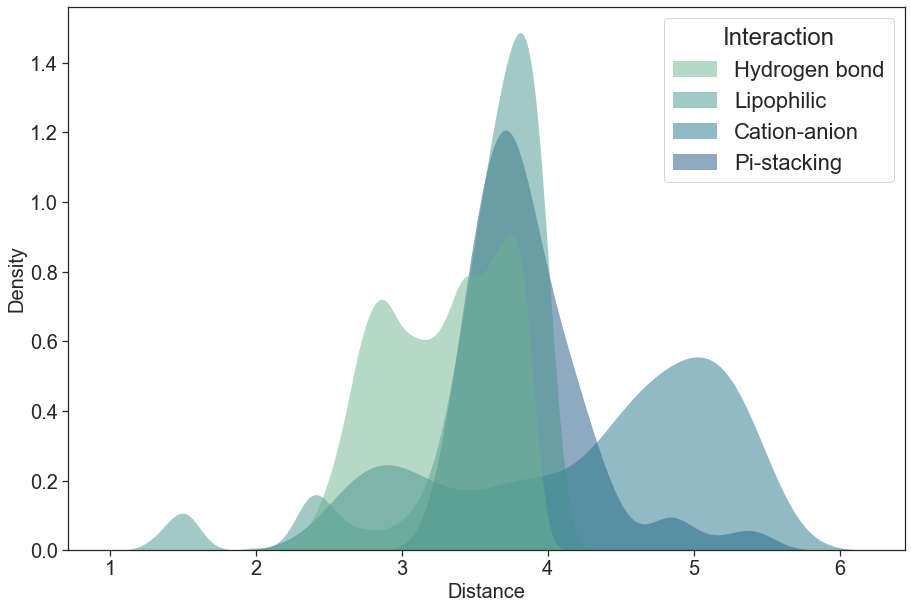

In [20]:
# nice looking, but not very useful :)

fig, ax = plt.subplots(figsize=(15, 10))

sns.kdeplot(
    ax=ax,
    data=distanceData4mostFrequent,
    x="Distance",
    hue="Interaction",
    fill=True,
    common_norm=False,
    palette="crest",
    alpha=.5,
    linewidth=0,
)

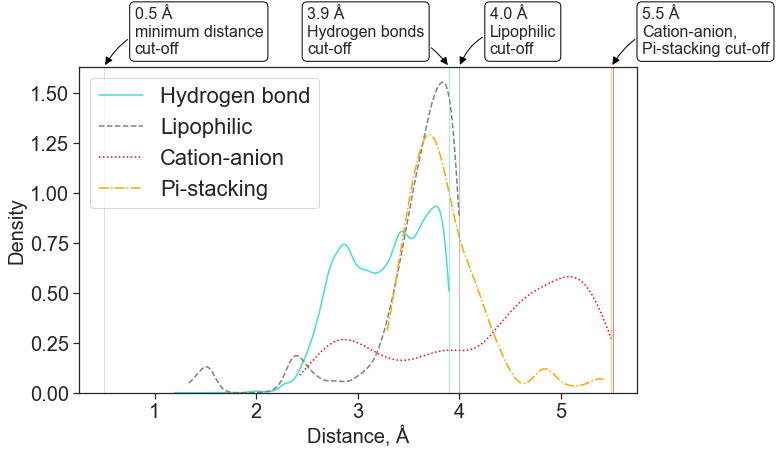

In [21]:
bbox_props = dict(boxstyle="round", fc="white", ec="black", lw=1)


def plotBoundary3(value, desc, hCorrection, color="silver", xCorr=0, rad=0.4):
    ax.axvline(value, ls='-', color=color, alpha=0.5, linewidth=1)
    
      
    ax.annotate(
        "%.1f Å\n%s" % (value, desc), (value, ax.get_ylim()[1] - hCorrection),
        xytext=(value + 0.3 + xCorr, ax.get_ylim()[1] - hCorrection + 0.3),
        xycoords='data', textcoords='data',
        arrowprops=dict(arrowstyle="-|>", connectionstyle='arc3,rad=%f' % (rad), color='black'),
        fontsize=16,
        bbox=bbox_props,
        horizontalalignment='left',
        verticalalignment='top'
    )


interactionColors = {}  # pymol colors adjusted to matplotlib colors
interactionColors['Hydrogen bond'] = "turquoise"
interactionColors['Cation-anion'] = "red"
interactionColors['Halogen bond'] = "purple"
interactionColors['Lipophilic'] = "gray"
interactionColors['Pi-stacking'] = "orange"
interactionColors['Pi-cation'] = "green"
interactionColors['Pi-anion'] = "hotpink"
interactionColors['Water-mediated'] = "blue"
interactionColors['Ion-mediated'] = "salmon"

lineStyles = ["-", "--", ":", "-."]

fig, ax = plt.subplots(figsize=(10, 6))

for i, Interaction in enumerate(mostFrequentInteractions):

    sns.kdeplot(ax=ax,
                data=distanceData4mostFrequent[
                    distanceData4mostFrequent.Interaction == Interaction],
                x="Distance",
                bw_adjust=.75,
                color=interactionColors[Interaction],
                common_norm=False,
                linestyle=lineStyles[i],
                cut=0)

plotBoundary3(MIN_DIST, "minimum distance\ncut-off", -0)

plotBoundary3(MAX_HB_DIST,
              "Hydrogen bonds\ncut-off",
              0.0,
              color=interactionColors['Hydrogen bond'], xCorr=-1.7, rad=-0.3)

plotBoundary3(MAX_LIPOHILIC_DIST,
              "Lipophilic\ncut-off",
              0,
              color=interactionColors['Lipophilic'])

plotBoundary3(MAX_CA_DIST,
              "Cation-anion,\nPi-stacking cut-off",
              0,
              color=interactionColors['Pi-stacking'])
ax.axvline(MAX_CA_DIST + 0.02,
           ls='-',
           color=interactionColors['Cation-anion'],
           alpha=0.5,
           linewidth=1)

ax.legend(labels=mostFrequentInteractions)
ax.set_xlabel("Distance, Å");


plt.savefig(imgSubDir + "distances-kde.png", dpi=600, bbox_inches="tight")

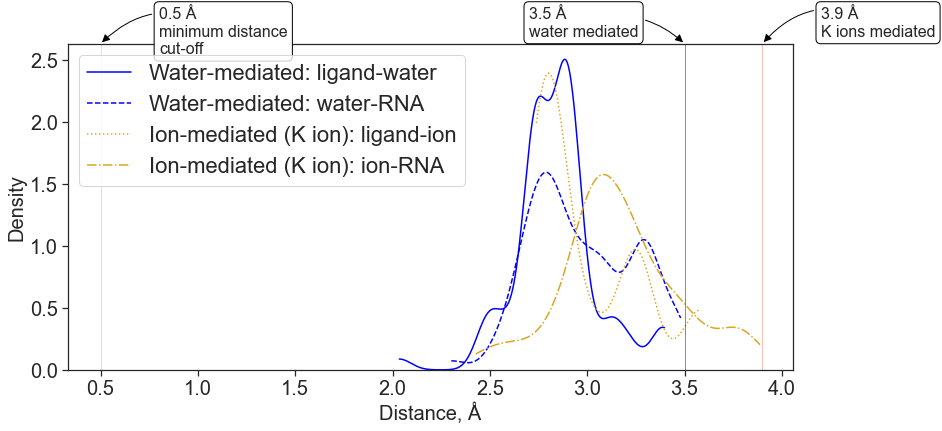

In [22]:
# for water and potassium

# ['Cation-anion', 'Halogen bond', 'Hydrogen bond',
#        'Ion-mediated (K ion): ligand-ion', 'Ion-mediated (K): ion-RNA',
#        'Ion-mediated (MG): ion-RNA', 'Ion-mediated (MN): ion-RNA',
#        'Ion-mediated (Mg ion): ligand-ion', 'Ion-mediated (PB): ion-RNA',
#        'Ion-mediated (SR): ion-RNA', 'Lipophilic', 'Pi-anion', 'Pi-cation',
#        'Pi-stacking', 'Water-mediated: ligand-water',
#        'Water-mediated: water-RNA'],
#       dtype='object', name='Interactio

interactionsWeWantHere = [
    'Water-mediated: ligand-water', 'Water-mediated: water-RNA', 
    'Ion-mediated (K ion): ligand-ion', 'Ion-mediated (K ion): ion-RNA'
    ]


colors = ['blue', 'blue', 'goldenrod', 'goldenrod']
lineStyles = ["-", "--", ":", "-."]

fig, ax = plt.subplots(figsize=(13, 6))

for i, Interaction in enumerate(interactionsWeWantHere):

    sns.kdeplot(
        ax=ax,
        data=distanceData4[distanceData4.Interaction == Interaction],
        x="Distance",
        color=colors[i],
        common_norm=False,
        linestyle=lineStyles[i], cut=0, bw_adjust=.75,
    )
    
plotBoundary3(MIN_DIST, "minimum distance\ncut-off", 0)
plotBoundary3(MAX_POTASSIUM_DIST, "K ions mediated", 0, color=interactionColors['Ion-mediated'])
plotBoundary3(MAX_WATER_DIST, "water mediated", 0, color=interactionColors['Water-mediated'], xCorr=-1.1, rad=-0.3)


ax.legend(labels=interactionsWeWantHere)
ax.set_xlabel("Distance, Å");


plt.savefig(imgSubDir + "distances2-kde.png", dpi=600, bbox_inches="tight")

### Skewness and Kurtosis

In [23]:
from scipy.stats import gaussian_kde
from scipy.stats import kurtosis, skew
from scipy.optimize import fminbound

import statistics

interactionTypes = list(set(distanceData4.Interaction.values))

# interactionTypes

AlmostAllInteractions = [
'Hydrogen bond',
'Lipophilic',
'Cation-anion',
'Water-mediated: ligand-water',
'Water-mediated: water-RNA',
'Pi-stacking',
'Pi-cation',
'Ion-mediated (K ion): ion-RNA',
'Ion-mediated (K ion): ligand-ion',
'Ion-mediated (MG ion): ion-RNA',
'Ion-mediated (Mg ion): ligand-ion',
'Pi-anion',
'Halogen bond',
]


Hydrogen bond	K:-1.4728045967635972	S:0.5569262513854849	MAX:3.7427051368831115	Mean:3.267558923597294


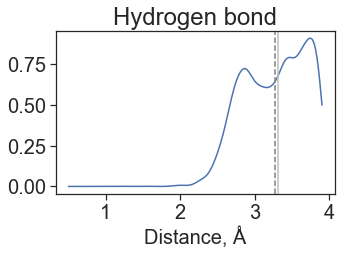

In [24]:
for i, Interaction in enumerate(AlmostAllInteractions):
    
    xs = np.linspace(MIN_DIST, interactionDistances[Interaction], 200)
    
    dataSelectedForKde = distanceData4[distanceData4.Interaction == Interaction]["Distance"]
    
    kde = gaussian_kde(dataSelectedForKde)

#     kde.covariance_factor = lambda : .25
#     kde._compute_covariance()
    
#     print("*** ", Interaction)
    
    
#     print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(kde(xs)) ))
#     print( 'skewness of normal distribution (should be 0): {}'.format( skew(kde(xs)) ))
        
    max_x = fminbound(lambda x: -kde(x), MIN_DIST, interactionDistances[Interaction], full_output=False)[0]
#     print("Peak distance", max_x)
    
    kdexs = kde(xs)
    
    mean = dataSelectedForKde.mean()
    median = statistics.median(dataSelectedForKde)
    
    print ("{}\tK:{}\tS:{}\tMAX:{}\tMean:{}".format(Interaction, kurtosis(kdexs), skew(kdexs), max_x, mean))
    
    
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.plot(xs, kde(xs))
    
    ax.set_title(Interaction)
    ax.set_xlabel('Distance, Å')
    
    ax.axvline(mean, ls='--', color="gray")
    ax.axvline(median, ls='-', color="silver")
    
    plt.show()
    
    break;



## Preferred RNA atoms for various interactions

⚠️ Still, only for canonical bases (and Mg, K, ions, and H2O)

In [25]:
# only for hydrogen bonds

distanceDataHB = distanceData4[distanceData4['Interaction'] == 'Hydrogen bond'].replace(r'\s*(.*?)\s*', r'\1', regex=True)
distanceDataLipo = distanceData4[distanceData4['Interaction'] == 'Lipophilic'].replace(r'\s*(.*?)\s*', r'\1', regex=True)

In [26]:
distanceDataHB.replace(r'\s*(.*?)\s*', r'\1', regex=True).groupby("Receptor_Atom").groups.keys()

dict_keys(['N1', 'N2', 'N3', 'N4', 'N6', 'N7', 'O2', "O2'", "O3'", 'O4', "O4'", "O5'", 'O6', 'OP1', 'OP2'])

In [27]:
distanceDataLipo.replace(r'\s*(.*?)\s*', r'\1', regex=True).groupby("Receptor_Atom").groups.keys()

dict_keys(["C1'", 'C2', "C2'", "C3'", 'C4', "C4'", 'C5', "C5'", 'C6', 'C8'])

In [28]:
# atomsOrder = ['OP1', 'OP2', "O2'", "O3'", "O4'", "O5'", 'N1', 'N2', 'N3', 'N4', 'N6', 'N7',
#               'O2', 'O4', 'O6']

atomsOrderNoBases = ['OP1', 'OP2', "O2'", "O3'", "O4'", "O5'"]

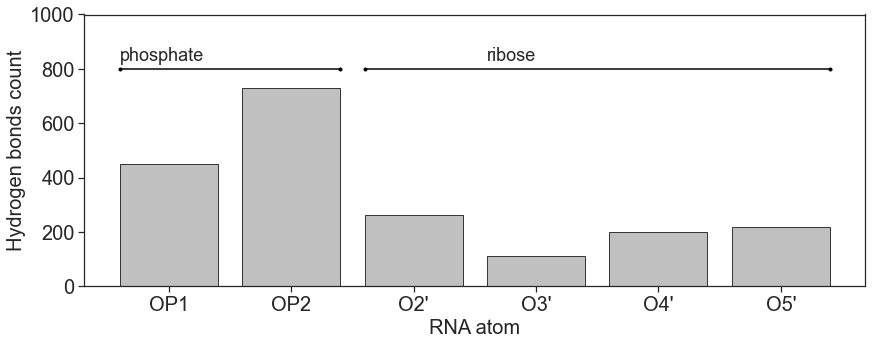

In [29]:
fig_dims = (14, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x="Receptor_Atom",
              data=distanceDataHB,
              ax=ax,
              order=atomsOrderNoBases,
              color='silver',
              edgecolor="black",
              linewidth=0.75)

ax.set_ylabel('Hydrogen bonds count')
ax.set_xlabel('RNA atom')

ax.set_ylim(0, 1000)


def makeLine(start, stop, h, text, correction=0):
    plt.plot([start - 0.4, stop + 0.4], [h, h], marker=".", color="black")
    plt.text(start - 0.4 + correction,
             h + 30,
             text,
             fontsize=18,
             horizontalalignment='left')


h = 800
makeLine(0, 1, h, "phosphate")
makeLine(2, 5, h, "ribose", correction=1)
# makeLine(6, 14, h, "nucleobase", correction=3)

Preferences of RNA atoms to form hydrogen bonds

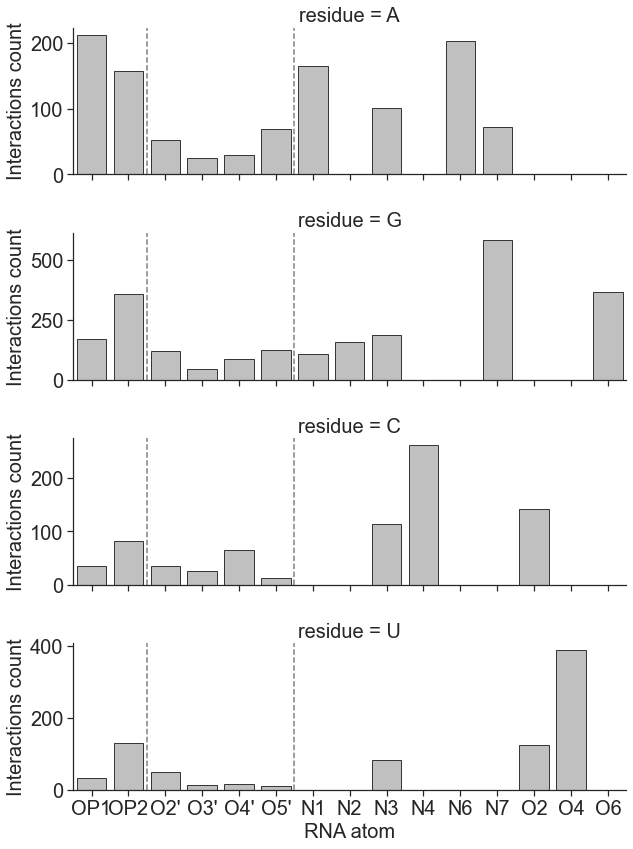

In [30]:
atomsOrderHB = [
    'OP1', 'OP2', "O2'", "O3'", "O4'", "O5'", 'N1', 'N2', 'N3', 'N4', 'N6',
    'N7', 'O2', 'O4', 'O6'
]


def plotBoundary2(axNo, value):
    ax = g.axes[axNo]
    ax.axvline(value, ls='--', color="gray")


def makeLine2(axNo, start, stop, h, text, correction=0):
    ax = g.axes[axNo]
    ax.plot([start - 0.4, stop + 0.4], [h, h], marker=".", color="black")
    ax.text(start - 0.4 + correction,
             h + 30,
             text,
             fontsize=18,
             horizontalalignment='left')


g = sns.FacetGrid(
    distanceDataHB.rename(columns={'Receptor_Residue_Name': 'residue'}),
    col="residue",
    sharey=False,
    col_wrap=1,
    col_order = ['A', 'G', 'C', 'U'],
    height=3,
    aspect=3)
g.map_dataframe(sns.countplot,
                x="Receptor_Atom",
                color='silver',
                order=atomsOrderHB,
                edgecolor="black",
                linewidth=0.75)

g.set_axis_labels("RNA atom", "Interactions count")

for axNo in range(0, 4):
    plotBoundary2(axNo, 1.5)
    plotBoundary2(axNo, 5.5)

# makeLine2(0, 0, 1, h, "phosphate")

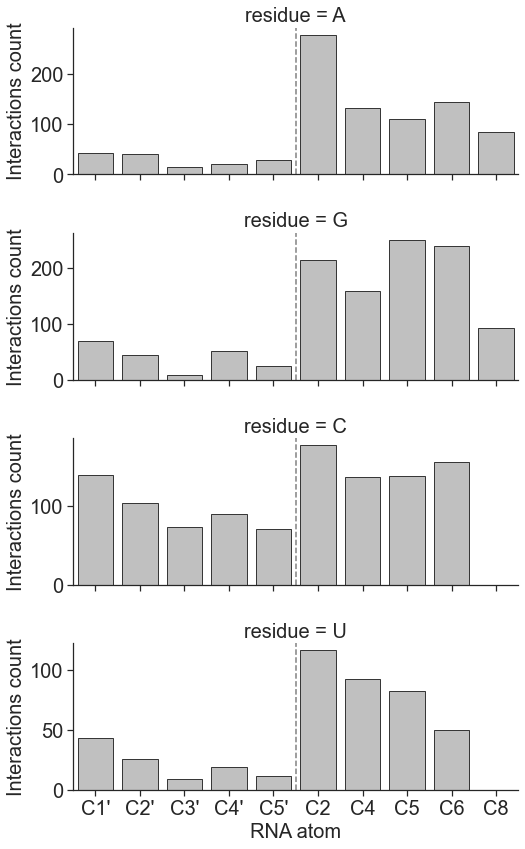

In [32]:
### For lipophilic

atomsOrderLipo = ["C1'", "C2'", "C3'", "C4'", "C5'", 'C2', 'C4', 'C5', 'C6', 'C8']

def plotBoundary2(axNo, value):
    ax = g.axes[axNo]
    ax.axvline(value, ls='--', color="gray")


g = sns.FacetGrid(
    distanceDataLipo.rename(columns={'Receptor_Residue_Name': 'residue'}),
    col="residue",
    sharey=False,
    col_wrap=1,
    col_order = ['A', 'G', 'C', 'U'],
    height=3,
    aspect=2.5)
g.map_dataframe(sns.countplot,
                x="Receptor_Atom",
                color='silver',
                order=atomsOrderLipo,
                edgecolor="black",
                linewidth=0.75)

g.set_axis_labels("RNA atom", "Interactions count")

for axNo in range(0, 4):
    plotBoundary2(axNo, 4.5)


### overall atoms statistics for all bases
#### HB

In [31]:
distanceDataHB2 = distanceDataHB.groupby(["Receptor_Atom"]).agg({'PDB':'count'}) #['PDB']/totalInteractions*100
suma = distanceDataHB2.sum() # 5026
distanceDataHB2["proc"] = distanceDataHB2["PDB"] / 5026

distanceDataHB2.reindex(atomsOrderHB)

,PDB,proc
Receptor_Atom,,
OP1,451,0.089733
OP2,728,0.144847
O2',261,0.051930
O3',111,0.022085
O4',199,0.039594
O5',217,0.043175
N1,273,0.054318
N2,156,0.031039
N3,486,0.096697


#### Lipo

In [65]:
distanceDataLipo2 = distanceDataLipo.groupby(["Receptor_Atom"]).agg({'PDB':'count'}) #['PDB']/totalInteractions*100
suma = distanceDataLipo2.sum()
print(suma) # 3582
distanceDataLipo2["proc"] = distanceDataLipo2["PDB"] / 3582

distanceDataLipo2.reindex(atomsOrderLipo)

PDB    3582
dtype: int64


,PDB,proc
Receptor_Atom,,
C1',294,0.082077
C2',215,0.060022
C3',105,0.029313
C4',181,0.050530
C5',135,0.037688
C2,786,0.219430
C4,519,0.144891
C5,581,0.162200
C6,590,0.164712


#### Pi-anion

In [72]:
distanceDataPiAnion = distanceData4[distanceData4['Interaction'] == 'Pi-anion'].replace(r'\s*(.*?)\s*', r'\1', regex=True)


distanceDataPiAnion2 = distanceDataPiAnion.groupby(["Receptor_Atom"]).agg({'PDB':'count'}) #['PDB']/totalInteractions*100
suma = distanceDataPiAnion2.sum()

print(suma) # 3582

distanceDataPiAnion2
distanceDataPiAnion2["proc"] = distanceDataPiAnion2["PDB"] / 28

distanceDataPiAnion2
# distanceDataLipo2.reindex(atomsOrderLipo)

PDB    28
dtype: int64


,PDB,proc
Receptor_Atom,,
"C4,C5,N7,C8,N9",10,0.357143
"N1,C2,N3,C4,C5,C6",13,0.464286
OP1,4,0.142857
OP2,1,0.035714


#### Halogen bonds

In [78]:
distanceDataHal = distanceData4[distanceData4['Interaction'] == 'Halogen bond'].replace(r'\s*(.*?)\s*', r'\1', regex=True)


distanceDataHal2 = distanceDataHal.groupby(["Receptor_Atom"]).agg({'PDB':'count'}) #['PDB']/totalInteractions*100
suma = distanceDataHal2.sum()

print(suma) # 6

distanceDataHal2
distanceDataHal2["proc"] = distanceDataHal2["PDB"] / 6
distanceDataHal2


PDB    6
dtype: int64


,PDB,proc
Receptor_Atom,,
N3,1,0.166667
O2',3,0.500000
O3',1,0.166667
O4',1,0.166667


#### All bonds

In [99]:
atomsOrderAll = [ 'OP1', 'OP2', "O2'", "O3'", "O4'", "O5'", "C1'", "C2'", "C3'", "C4'", "C5'", 'N1', 'N2', 'N3', 'N4', 'N6',
    'N7', 'O2', 'O4', 'O6', 'C2', 'C4', 'C5', 'C6', 'C8', 'C4,C5,N7,C8,N9', 'N1,C2,N3,C4,C5,C6' ]

distanceDataAll2 = distanceData4.replace(r'\s*(.*?)\s*', r'\1', regex=True).groupby(["Receptor_Atom"]).agg({'PDB':'count'}) #['PDB']/totalInteractions*100


distanceDataAll2 = distanceDataAll2.filter(items=atomsOrderAll, axis=0).reindex(atomsOrderAll)

suma = distanceDataAll2.sum()
print(suma) # 10041

distanceDataAll2["proc"] = distanceDataAll2["PDB"] / 10041


# # distanceDataAll2.reindex(atomsOrderAll)

distanceDataAll2

PDB    10041
dtype: int64


,PDB,proc
Receptor_Atom,,
OP1,844,0.084055
OP2,1328,0.132258
O2',293,0.029180
O3',117,0.011652
O4',227,0.022607
O5',224,0.022309
C1',294,0.029280
C2',215,0.021412
C3',105,0.010457


## Statistics of interactions - tables

this is for distanceData4 - i.e., with non-standard residues removed.

In [33]:
# 'Hydrogen bond', 'Lipophilic', 'Cation-anion', 'Pi-stacking', 
# distanceDataLipo.groupby([ 'Receptor_Residue_Name', 'Receptor_Atom']).describe()

distanceData4[distanceData4['Interaction'] == 'Pi-stacking'].replace(
    r'\s*(.*?)\s*', r'\1',
    regex=True).groupby(['Receptor_Residue_Name', 'Receptor_Atom']).describe()

Distance                               \
                                           count      mean       std      min   
Receptor_Residue_Name Receptor_Atom                                             
A                     C4,C5,N7,C8,N9        16.0  4.065669  0.420450  3.49372   
                      N1,C2,N3,C4,C5,C6     43.0  3.850747  0.506086  3.35783   
C                     N1,C2,N3,C4,C5,C6     45.0  3.931858  0.244677  3.51372   
G                     C4,C5,N7,C8,N9         9.0  3.728742  0.231948  3.31474   
                      N1,C2,N3,C4,C5,C6     23.0  3.718450  0.430517  3.29114   
U                     N1,C2,N3,C4,C5,C6     10.0  3.815795  0.502369  3.38222   

                                                                               
                                              25%      50%       75%      max  
Receptor_Residue_Name Receptor_Atom                                            
A                     C4,C5,N7,C8,N9     3.749080  4.01143  4.318378  4.83704  
                      N1,C2,N3,C4,C5,C6  3.516035  3.69753  3.911045  5.41802  
C                     N1,C2,N3,C4,C5,C6  3.746240  3.90394  4.123220  4.41515  
G                     C4,C5,N7,C8,N9     3.635910  3.76118  3.812230  4.15277  
                      N1,C2,N3,C4,C5,C6  3.524030  3.62832  3.727960  5.42357  
U                     N1,C2,N3,C4,C5,C6  3.487070  3.73944  3.875555  5.12827

In [34]:
distanceStats = distanceData4.groupby('Interaction')['Distance'].describe().sort_values(by='count', ascending=False)
distanceStats

,count,mean,std,min,25%,50%,75%,max
Interaction,,,,,,,,
Hydrogen bond,5026.0,3.267559,0.415372,1.19585,2.912950,3.313600,3.637093,3.89943
Lipophilic,3582.0,3.528625,0.536733,1.33450,3.460725,3.693000,3.853450,3.99950
Cation-anion,899.0,4.323543,0.889922,2.42695,3.632100,4.603660,5.068630,5.49970
Water-mediated: ligand-water,151.0,2.844711,0.220643,2.03483,2.727780,2.863090,2.925830,3.39636
Water-mediated: water-RNA,151.0,2.976321,0.269733,2.30180,2.765100,2.945500,3.241150,3.48020
Pi-stacking,146.0,3.868544,0.409878,3.29114,3.606922,3.773750,4.033980,5.42357
Pi-cation,96.0,4.781580,0.685639,3.03880,4.470957,4.781740,5.315785,5.98758
Ion-mediated (K ion): ion-RNA,64.0,3.169092,0.307378,2.42790,3.010000,3.121950,3.315475,3.88770
Ion-mediated (K ion): ligand-ion,64.0,3.000108,0.277599,2.73901,2.801180,2.850705,3.240330,3.58197


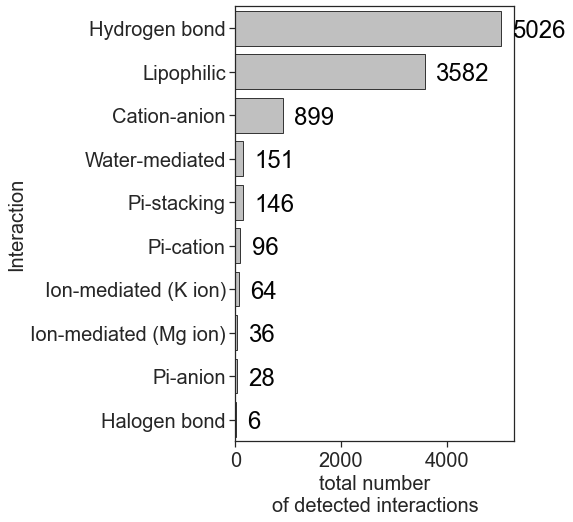

In [35]:
def show_values_on_bars(axs, h_v="v", space=213.9, ycorrection=-0.2):
    # https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                if value >= 0:
                    ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() + ycorrection
                value = int(p.get_width())
                if value >= 0:
                    ax.text(_x, _y, str(value) , ha="left", color="black", alpha=0.99)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

        
# ------------------------------------------------------------------------------------------------ #

distanceStatsCopy = distanceStats.copy()


distanceStatsCopy.rename(columns={'Ligand_name': 'Structures count'},
                       index={
                           'Ion-mediated (MG ion): ion-RNA':
                           'Ion-mediated (Mg ion)',
                           'Ion-mediated (K ion): ion-RNA':
                           'Ion-mediated (K ion)',
                           'Water-mediated: water-RNA': 'Water-mediated'
                       },
                       inplace=True)

distanceStatsCopy.drop(index=['Ion-mediated (Mg ion): ligand-ion', 'Ion-mediated (K ion): ligand-ion', 'Water-mediated: ligand-water'], inplace=True)

# only top 10
distanceStatsCopy = distanceStatsCopy.iloc[:10, :]

# ------------------------------------------------------------------------------------------------ #

fig_dims = (5, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x="count", y=distanceStatsCopy.index, data=distanceStatsCopy,
                            color='silver',
                edgecolor="black",
                linewidth=0.75
            )

ax.set_ylabel('Interaction');
ax.set_xlabel('total number\nof detected interactions');
show_values_on_bars(ax, "h")

plt.savefig(imgSubDir + "total_no_of_interactions.png", dpi=600, bbox_inches="tight")

### Data for proteins

Taken from: de Freitas, Renato Ferreira, and Matthieu Schapira. "A systematic analysis of atomic protein–ligand interactions in the PDB." Medchemcomm 8.10 (2017): 1970-1981.

In [36]:
distanceStatsCopy.index

Index(['Hydrogen bond', 'Lipophilic', 'Cation-anion', 'Water-mediated',
       'Pi-stacking', 'Pi-cation', 'Ion-mediated (K ion)',
       'Ion-mediated (Mg ion)', 'Pi-anion', 'Halogen bond'],
      dtype='object', name='Interaction')

In [37]:
proteinStatsIndex = ['Hydrogen bond', 'Lipophilic', 'Cation-anion', 'Water-mediated',
       'Pi-stacking', 'Pi-cation', 'Ion-mediated (K ion)',
       'Ion-mediated (Mg ion)', 'Pi-anion', 'Halogen bond']

proteinData = { 'count': [28577+13600, 66772, 7276, -0.001,
               8704 + 8537, 2577, -0.001, -0.001, -0.001, 351] }

proteinStatsDf = pd.DataFrame(data=proteinData, index = proteinStatsIndex)

proteinStatsDf

,count
Hydrogen bond,42177.000
Lipophilic,66772.000
Cation-anion,7276.000
Water-mediated,-0.001
Pi-stacking,17241.000
Pi-cation,2577.000
Ion-mediated (K ion),-0.001
Ion-mediated (Mg ion),-0.001
Pi-anion,-0.001
Halogen bond,351.000


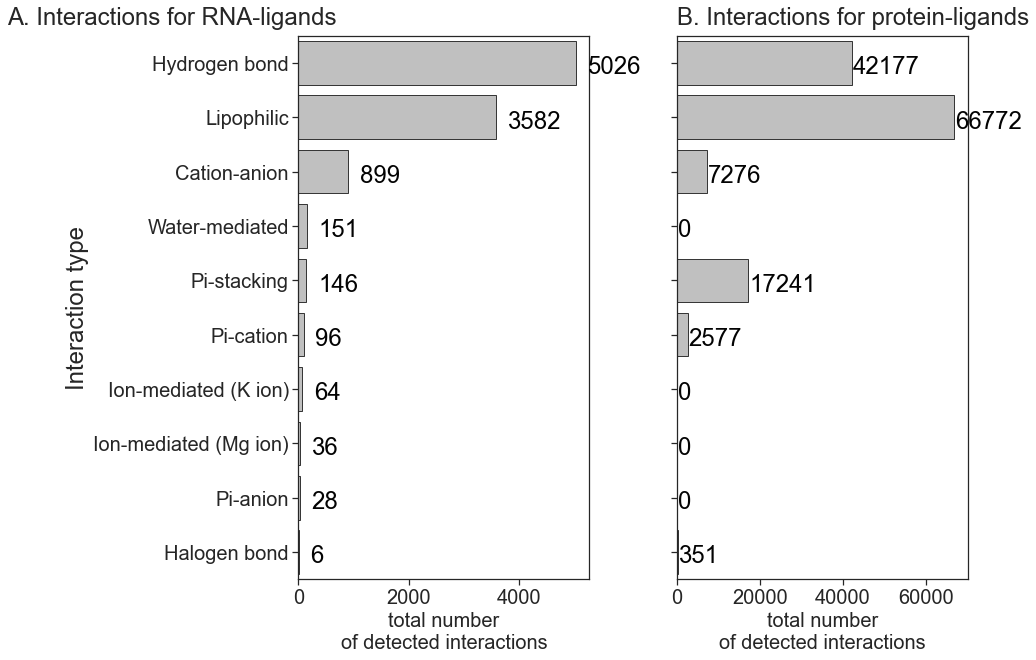

In [38]:
def show_values_on_bars(axs, h_v="v", space=213.9, ycorrection=-0.2):
    # https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                if value >= 0:
                    ax.text(_x, _y, value, ha="center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() + ycorrection
                value = int(p.get_width())
                if value >= 0:
                    ax.text(_x,
                            _y,
                            str(value),
                            ha="left",
                            color="black",
                            alpha=0.99)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 10))

# ------------------------------------------------------------------------------------------------ #

sns.barplot(x="count",
            y=distanceStatsCopy.index,
            data=distanceStatsCopy,
            color='silver',
            edgecolor="black",
            linewidth=0.75,
            ax=axes[0])

sns.barplot(x="count",
            y=proteinStatsDf.index,
            data=proteinStatsDf,
            color='silver',
            edgecolor="black",
            linewidth=0.75,
            ax=axes[1])

axes[0].set_ylabel('Interaction type', fontsize=24)
axes[0].set_xlabel('total number\nof detected interactions')
axes[1].set_xlabel('total number\nof detected interactions')
show_values_on_bars(axes[0], "h")
show_values_on_bars(axes[1], "h")

axes[0].set_title('A. Interactions for RNA-ligands',
                  loc="left",
                  fontdict={
                      'verticalalignment': 'bottom',
                      'position': (-1, 1)
                  })
axes[1].set_title('B. Interactions for protein-ligands',
                  loc="left",
                  fontdict={
                      'verticalalignment': 'bottom',
                      'position': (0, 1)
                  })

plt.subplots_adjust(wspace=0.3)

plt.savefig(imgSubDir + "total_no_of_interactions+protein.png", dpi=600, bbox_inches="tight")

## number of structures with the given interaction

In [39]:
# number of structures with the given interaction

numberOfStructures = len(distanceData4.groupby(['PDB']))

print(numberOfStructures)

popularityStats = pd.DataFrame(
    distanceData4.groupby(['PDB',
                           'Interaction']).count()['Ligand_name'].groupby([
                               'Interaction'
                           ]).count().sort_values(ascending=False)).head(13)
popularityStats[
    'percentage of all structures'] = popularityStats / numberOfStructures * 100

popularityStats.rename(columns={'Ligand_name': 'Structures count'},
                       index={
                           'Ion-mediated (MG ion): ion-RNA':
                           'Ion-mediated (Mg ion)',
                           'Ion-mediated (K ion): ion-RNA':
                           'Ion-mediated (K ion)',
                           'Water-mediated: water-RNA': 'Water-mediated'
                       },
                       inplace=True)

popularityStats.drop(index=[
    'Ion-mediated (Mg ion): ligand-ion', 'Ion-mediated (K ion): ligand-ion',
    'Water-mediated: ligand-water'
],
                     inplace=True)

# popularityStats = popularityStats[popularityStats.index != 'Water-mediated: ligand-water']

popularityStats

207


,Structures count,percentage of all structures
Interaction,,
Hydrogen bond,206,99.516908
Lipophilic,196,94.685990
Cation-anion,127,61.352657
Pi-cation,66,31.884058
Pi-stacking,62,29.951691
Water-mediated,31,14.975845
Pi-anion,22,10.628019
Ion-mediated (Mg ion),16,7.729469
Ion-mediated (K ion),13,6.280193


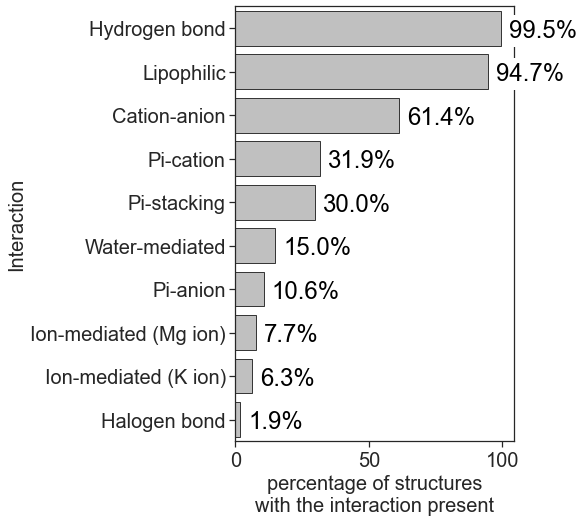

In [40]:
def show_values_on_barsProc(axs, h_v="v", space=2.9, ycorrection=-0.2):
    # https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = "%.1f" % (p.get_width())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() + ycorrection
                value = "%.1f" % (p.get_width())
                ax.text(_x, _y, str(value) + "%", ha="left", color="black", backgroundcolor="white")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

fig_dims = (5, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x="percentage of all structures", y=popularityStats.index, data=popularityStats,
                            color='silver',
                edgecolor="black",
                linewidth=0.75
            )

ax.set_ylabel('Interaction');
ax.set_xlabel('percentage of structures\nwith the interaction present');
show_values_on_barsProc(ax, "h")


plt.savefig(imgSubDir + "proc_of_structures_with_interaction.png", dpi=600, bbox_inches="tight")

### Structures with ions and water

In [41]:
# number of structures with the given interaction


# Interaction
# CA                 904
# HAL                  6
# HB                5063
# Ion-mediated       214
# Lipophilic        3609
# Pi_Anion            28
# Pi_Cation           97
# Pi_Stacking        146
# Water-mediated     302

tempDf = pd.DataFrame(fulldata.groupby(['PDB', 'Interaction']).count()['Ligand_name'])

tempDf

print("water mediated:")
print (len(tempDf[tempDf.index.isin(['Water-mediated'], level=1)]))

print("Ion mediated:")
# print (len(
# tempDf[tempDf.index.isin(['Ion-mediated'], level=1)] #.groupby(['PDB']).count() #))

fulldata

water mediated:
31
Ion mediated:


,Ligand_name,Ligand_pose,Ligand_occurrence_in_sdf,Interaction,Ligand_Atom,Ligand_X,Ligand_Y,Ligand_Z,Receptor_Residue_Name,Receptor_Number,Receptor_Chain,Receptor_Atom,Receptor_X,Receptor_Y,Receptor_Z,Distance,PDB,LigandNumber
0,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
1,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
2,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
3,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
4,1AJU,1,1,HB,8,-4.054,-2.296,-1.685,A,22,A,N7,-4.333,0.639,-0.874,3.05774,1AJU,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,4V8F,1,1,HB,4,3.951,210.818,13.180,U,1495,B,O4,3.359,213.771,12.488,3.09023,4V8F,1
57,4V8F,1,1,HB,4,3.951,210.818,13.180,U,1495,B,O4,3.359,213.771,12.488,3.09023,4V8F,1
58,4V8F,1,1,HB,4,3.951,210.818,13.180,C,1496,B,N4,3.733,211.846,9.460,3.86558,4V8F,1
59,4V8F,1,1,HB,4,3.951,210.818,13.180,C,1496,B,N4,3.733,211.846,9.460,3.86558,4V8F,1


### Data for RNA from Pedroni

 RSC Med. Chem., 2020,802

In [42]:
pedroniStatsDict = {
    'Hydrogen bond': 762,
    'Lipophilic': 395,
    'Cation-anion': 63,
    'Water-mediated': -0.001,
    'Pi-stacking': 764,  # pi stacking only
    'Pi-cation': 66,
    'Ion-mediated (K ion)': 8,
    'Ion-mediated (Mg ion)': 15,
    'Pi-anion': -0.001,
    'Halogen bond': 0
}

# inorganic ions mediated: 23

pedroniStatsDf = pd.DataFrame.from_dict(pedroniStatsDict,
                                        orient='index',
                                        columns=["count"])

pedroniStatsDf

,count
Hydrogen bond,762.000
Lipophilic,395.000
Cation-anion,63.000
Water-mediated,-0.001
Pi-stacking,764.000
Pi-cation,66.000
Ion-mediated (K ion),8.000
Ion-mediated (Mg ion),15.000
Pi-anion,-0.001
Halogen bond,0.000


## Combo - all four plots in one

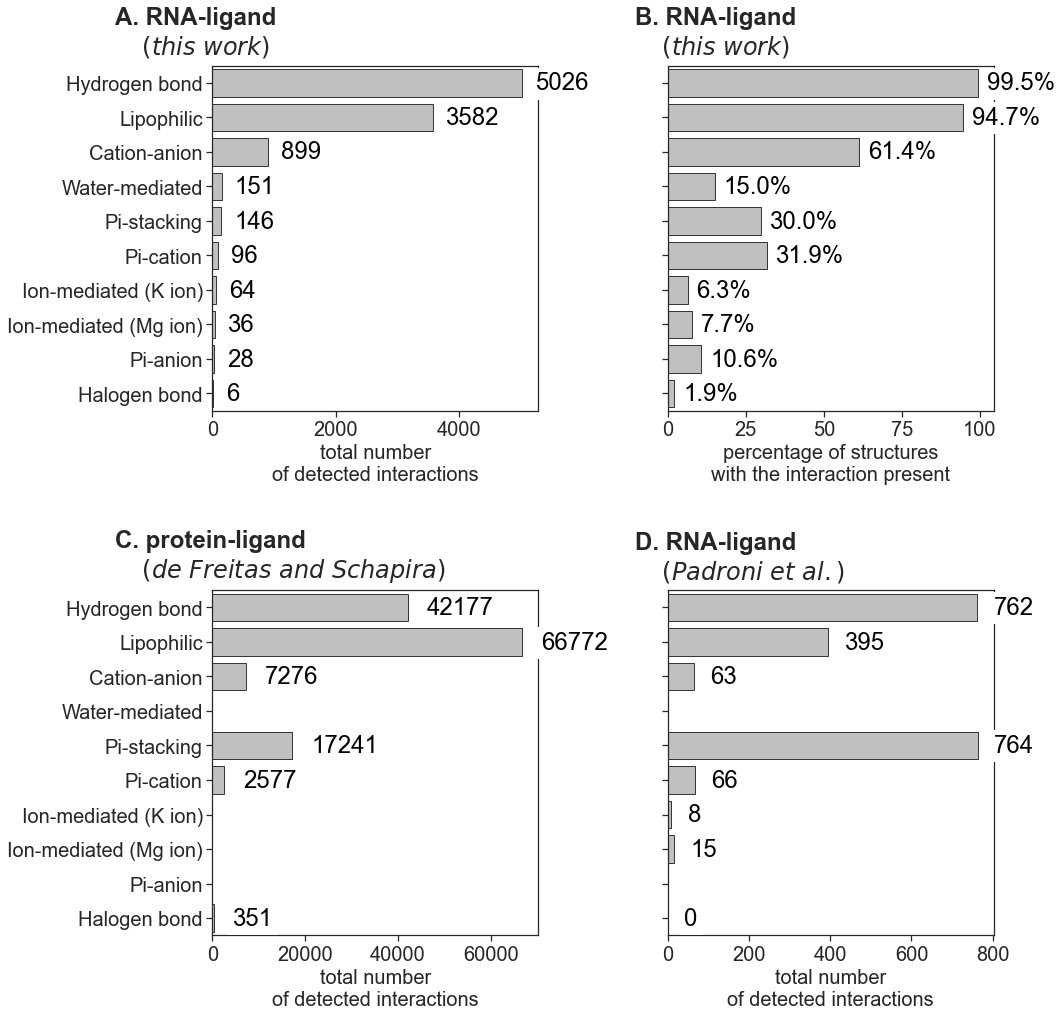

In [43]:
def show_values_on_bars(axs, h_v="v", space=213.9, ycorrection=-0.2):
    # https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
    def _show_on_single_plot(ax):
        if h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() + ycorrection
                value = p.get_width()
                valueInt = int(value)
                if value >= 0:
                    ax.text(_x,
                            _y,
                            str(valueInt),
                            ha="left",
                            color="black", backgroundcolor="white",
                            alpha=0.99)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


# ------------------------------------------------------------------------------------------------ #
        
# reindex popularityStats to have the same index as distanceStatsCopy

popularityStatsResorted = popularityStats.reindex(distanceStatsCopy.index)

# ------------------------------------------------------------------------------------------------ #
        
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(14, 16))

# ------------------------------------------------------------------------------------------------ #

sns.barplot(x="count",
            y=distanceStatsCopy.index,
            data=distanceStatsCopy,
            color='silver',
            edgecolor="black",
            linewidth=0.75,
            ax=axes[0,0])

sns.barplot(x="percentage of all structures",
            y=popularityStatsResorted.index,
            data=popularityStatsResorted,
            color='silver',
            edgecolor="black",
            linewidth=0.75,
            ax=axes[0,1])

sns.barplot(x="count",
            y=proteinStatsDf.index,
            data=proteinStatsDf,
            color='silver',
            edgecolor="black",
            linewidth=0.75,
            ax=axes[1,0])

sns.barplot(x="count",
            y=pedroniStatsDf.index,
            data=pedroniStatsDf,
            color='silver',
            edgecolor="black",
            linewidth=0.75,
            ax=axes[1,1])


# axes[0,0].set_ylabel('type of interaction', fontsize=24)
axes[0,0].set_ylabel('')
axes[0,1].set_ylabel('')

axes[0,0].set_xlabel('total number\nof detected interactions')
axes[0,1].set_xlabel('percentage of structures\nwith the interaction present')
axes[1,0].set_xlabel('total number\nof detected interactions')
axes[1,1].set_xlabel('total number\nof detected interactions')



show_values_on_bars(axes[0,0], "h", space=213.9)
show_values_on_barsProc(axes[0,1], "h")
show_values_on_bars(axes[1,0], "h", space=4000)
show_values_on_bars(axes[1,1], "h", space=40)

axes[0,0].set_title('A. RNA-ligand\n' + r'    $(this\ work)$',
                  loc="left", weight='bold',
                  fontdict={
                      'verticalalignment': 'bottom',
                      'position': (-0.3, 1)
                  })

axes[0,1].set_title('B. RNA-ligand\n'  + r'    $(this\ work)$',
                  loc="left", weight='bold',
                  fontdict={
                      'verticalalignment': 'bottom',
                      'position': (-0.1, 1)
                  })

axes[1,0].set_title('C. protein-ligand\n' + r'    $(de\ Freitas\ and\ Schapira)$',
                  loc="left", weight='bold',
                  fontdict={
                      'verticalalignment': 'bottom',
                      'position': (-0.3, 1)
                  })

axes[1,1].set_title('D. RNA-ligand\n' + r'    $(Padroni\ et\ al.)$',
                  loc="left", weight='bold',
                  fontdict={
                      'verticalalignment': 'bottom',
                      'position': (-0.1, 1)
                  })


plt.subplots_adjust(wspace=0.4, hspace=0.52)

plt.savefig(imgSubDir + "total_no_of_interactions+protein+padroni.png", dpi=600, bbox_inches="tight")

## Wrapper-compatible stats

In [44]:
# statistics - count - one interaction for residue-ligand (as wrapper works)

Receptor_Residue_Name_we_dont_want = ['HOH', 'K', 'MG', 'MN', 'PB',
                                      'SR']  # ions and HOH

fulldata_filtered = fulldata[~fulldata['Receptor_Residue_Name'].
                             isin(Receptor_Residue_Name_we_dont_want)]

# fulldata_filtered = fulldata.copy()

wrapperCompatibleStats = pd.DataFrame(
    fulldata_filtered.replace(interactionDesc).groupby(by=[
        'PDB', 'LigandNumber', 'Receptor_Chain', 'Receptor_Number',
        'Interaction'
    ])['Ligand_name'].count().groupby('Interaction').count().sort_values(
        ascending=False))


# print(distanceStatsCopy.index)

wrapperCompatibleStats

# popularityStatsResorted = popularityStats.reindex(distanceStatsCopy.index)



,Ligand_name
Interaction,
Hydrogen bond,1371
Lipophilic,748
Cation-anion,509
Pi-stacking,109
Ion-mediated,83
Pi-cation,78
Water-mediated,59
Pi-anion,24
Halogen bond,4


Wrapper results:

```
HB                1371
Lipophilic         748
CA                 509
Pi_Stacking        109
Ion-mediated        83
Pi_Cation           78
Water-mediated      59
Pi_Anion            24
HAL                  4 
```

In [45]:
fuldataTemp = fulldata.copy()

fuldataTemp_filtered = fuldataTemp[~fuldataTemp['Receptor_Residue_Name'].
                             isin(Receptor_Residue_Name_we_dont_want)]


fuldataTemp_filtered

# fuldataTemp_filtered.to_csv("skasuj4.csv")

maskIons = fuldataTemp_filtered.Interaction == 'Ion-mediated'
maskNoIons = ~maskIons

# # # ion mediated only
fuldataTempIons= fuldataTemp_filtered[maskIons].copy()


# # # rest of interactions (no ion mediated)
fulldataTempRest = fuldataTemp_filtered[maskNoIons].copy()


# # # add info about ligand
fuldataTempIons['Interaction'] = fuldataTempIons['Interaction'] + " (" + fuldataTempIons['Ligand_name'].replace(ionsDict) + ")"


# # # cocnatenate ion mediated and the rest
fulldataTempAll = pd.concat([fuldataTempIons, fulldataTempRest])

# # # correct interaction names
fulldataTempAll = fulldataTempAll.replace(interactionDesc)

# # # count interactions

wrapperCompatibleStats = pd.DataFrame(
    fulldataTempAll.groupby(by=[
        'PDB', 'LigandNumber', 'Receptor_Chain', 'Receptor_Number', 'Receptor_Residue_Name',
        'Interaction'
    ])['Ligand_name'].count().groupby('Interaction').count().sort_values(
        ascending=False))


wrapperCompatibleStats

,Ligand_name
Interaction,
Hydrogen bond,1371
Lipophilic,748
Cation-anion,509
Pi-stacking,109
Pi-cation,78
Water-mediated,59
Ion-mediated (K ion),46
Ion-mediated (Mg ion),32
Pi-anion,24


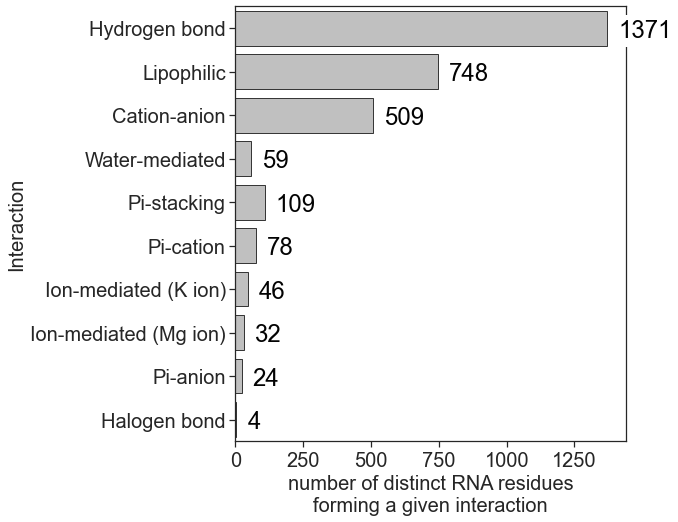

In [46]:
fig, ax = plt.subplots(figsize=(7, 8))


wrapperCompatibleStatsResorted = wrapperCompatibleStats.reindex(distanceStatsCopy.index)


sns.barplot(x="Ligand_name",
            y=wrapperCompatibleStatsResorted.index,
            data=wrapperCompatibleStatsResorted,
            color='silver',
            edgecolor="black",
            linewidth=0.75, ax=ax)

show_values_on_bars(ax, "h", space=40)

ax.set_xlabel('number of distinct RNA residues\nforming a given interaction');


plt.savefig(imgSubDir + "wrapper_like_statistics.png", dpi=600, bbox_inches="tight")

# Ligands features vs interactions

In [47]:
# read dscriptorsc calculated in KNIME

descriptors = pd.read_csv("molecular_descriptors/KNIME3.csv",
                       delimiter=",")

# this is a sum of charges. Can be =0 when +1 and -1 meets ;)
descriptors.drop(['Formal Charge'], inplace = True, axis=1)

descriptors.head(5)

,Molecule,Molecule name,NumHBD,NumHBA,NumAromaticRings,NumAliphaticRings,Formal Charge (pos),Formal Charge (neg)
0,[NH3+][C@H](C=O)CCCNC(=[NH2+])N,1AJU,4,1,0,0,2,0
1,[NH3+][C@H](C=O)CCCNC(=[NH2+])N,1AKX,4,1,0,0,2,0
2,P(=O)([O-])([O-])OC[C@H]1O[C@H]([C@@H]([C@@H]1...,1AM0,4,12,1,2,0,-2
3,[NH3+][C@H](C(=O)[O-])CCCNC(=[NH2+])N,1ARJ,4,2,0,0,2,-1
4,C1[C@@H]([NH3+])[C@@H]([C@H]([C@H](O[C@H]2O[C@...,1BYJ,8,7,0,3,5,0


In [48]:
distanceData4pivot = pd.pivot_table(distanceData4,
                                    index='PDB',
                                    columns='Interaction',
                                    values='Distance',
                                    aggfunc='count',
                                    fill_value=0)

distanceData4pivot.head(5)

Interaction,Cation-anion,Halogen bond,Hydrogen bond,Ion-mediated (K ion): ion-RNA,Ion-mediated (K ion): ligand-ion,Ion-mediated (MG ion): ion-RNA,Ion-mediated (MN ion): ion-RNA,Ion-mediated (Mg ion): ligand-ion,Ion-mediated (PB ion): ion-RNA,Ion-mediated (SR ion): ion-RNA,Lipophilic,Pi-anion,Pi-cation,Pi-stacking,Water-mediated: ligand-water,Water-mediated: water-RNA
PDB,,,,,,,,,,,,,,,,
1AJU,1,0,13,0,0,0,0,0,0,0,8,0,1,0,0,0
1AKX,1,0,15,0,0,0,0,0,0,0,6,0,2,0,0,0
1AM0,0,0,37,0,0,0,0,0,0,0,33,0,0,1,0,0
1ARJ,2,0,31,0,0,0,0,0,0,0,9,0,1,0,0,0
1BYJ,9,0,34,0,0,0,0,0,0,0,9,0,2,0,0,0


In [49]:
descriptors[descriptors['Molecule name'] == '1VQN']

,Molecule,Molecule name,NumHBD,NumHBA,NumAromaticRings,NumAliphaticRings,Formal Charge (pos),Formal Charge (neg)
63,C(O)[C@H]1O[C@H]([C@@H]([C@@H]1O[P@@](=O)(OC[C...,1VQN,8,30,5,3,0,-2
64,C(=O)CCCCCNC(=O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@...,1VQN,3,4,0,2,0,0


In [50]:
distanceAndDescriptors = pd.merge(distanceData4pivot,
                                  descriptors,
                                  left_index=True,
                                  right_on='Molecule name').drop(['Molecule'], axis=1)

distanceAndDescriptors = distanceAndDescriptors.set_index('Molecule name')

distanceAndDescriptors['NumHBA+D'] = distanceAndDescriptors['NumHBA'] + distanceAndDescriptors['NumHBD']

distanceAndDescriptors.to_csv("molecular_descriptors/joined.tsv", sep="\t")

distanceAndDescriptors.head(5)

,Cation-anion,Halogen bond,Hydrogen bond,Ion-mediated (K ion): ion-RNA,Ion-mediated (K ion): ligand-ion,Ion-mediated (MG ion): ion-RNA,Ion-mediated (MN ion): ion-RNA,Ion-mediated (Mg ion): ligand-ion,Ion-mediated (PB ion): ion-RNA,Ion-mediated (SR ion): ion-RNA,...,Pi-stacking,Water-mediated: ligand-water,Water-mediated: water-RNA,NumHBD,NumHBA,NumAromaticRings,NumAliphaticRings,Formal Charge (pos),Formal Charge (neg),NumHBA+D
Molecule name,,,,,,,,,,,,,,,,,,,,,
1AJU,1,0,13,0,0,0,0,0,0,0,...,0,0,0,4,1,0,0,2,0,5
1AKX,1,0,15,0,0,0,0,0,0,0,...,0,0,0,4,1,0,0,2,0,5
1AM0,0,0,37,0,0,0,0,0,0,0,...,1,0,0,4,12,1,2,0,-2,16
1ARJ,2,0,31,0,0,0,0,0,0,0,...,0,0,0,4,2,0,0,2,-1,6
1BYJ,9,0,34,0,0,0,0,0,0,0,...,0,0,0,8,7,0,3,5,0,15


In [51]:
# our favourite test case
distanceAndDescriptors[distanceAndDescriptors.index == '1VQN']

,Cation-anion,Halogen bond,Hydrogen bond,Ion-mediated (K ion): ion-RNA,Ion-mediated (K ion): ligand-ion,Ion-mediated (MG ion): ion-RNA,Ion-mediated (MN ion): ion-RNA,Ion-mediated (Mg ion): ligand-ion,Ion-mediated (PB ion): ion-RNA,Ion-mediated (SR ion): ion-RNA,...,Pi-stacking,Water-mediated: ligand-water,Water-mediated: water-RNA,NumHBD,NumHBA,NumAromaticRings,NumAliphaticRings,Formal Charge (pos),Formal Charge (neg),NumHBA+D
Molecule name,,,,,,,,,,,,,,,,,,,,,
1VQN,0,0,36,0,0,0,0,0,0,0,...,6,0,0,8,30,5,3,0,-2,38
1VQN,0,0,36,0,0,0,0,0,0,0,...,6,0,0,3,4,0,2,0,0,7


In [52]:
# change values to booleans - if interaction exists or not and if HBAD etc exists

distanceAndDescriptorsBool = distanceAndDescriptors != 0


distanceAndDescriptorsBoolGroup = distanceAndDescriptorsBool.groupby('Molecule name').any()

distanceAndDescriptorsBoolGroup['Has charges'] = distanceAndDescriptorsBoolGroup['Formal Charge (pos)'] + distanceAndDescriptorsBoolGroup['Formal Charge (neg)']

distanceAndDescriptorsBoolGroup = distanceAndDescriptorsBoolGroup.astype(int)
distanceAndDescriptorsBoolGroup.head()

/home/filips/miniconda2/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


,Cation-anion,Halogen bond,Hydrogen bond,Ion-mediated (K ion): ion-RNA,Ion-mediated (K ion): ligand-ion,Ion-mediated (MG ion): ion-RNA,Ion-mediated (MN ion): ion-RNA,Ion-mediated (Mg ion): ligand-ion,Ion-mediated (PB ion): ion-RNA,Ion-mediated (SR ion): ion-RNA,...,Water-mediated: ligand-water,Water-mediated: water-RNA,NumHBD,NumHBA,NumAromaticRings,NumAliphaticRings,Formal Charge (pos),Formal Charge (neg),NumHBA+D,Has charges
Molecule name,,,,,,,,,,,,,,,,,,,,,
1AJU,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,1
1AKX,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,1
1AM0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,1,1,1
1ARJ,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,1,1
1BYJ,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,1,1


In [53]:
# our favourite test case
distanceAndDescriptorsBoolGroup[distanceAndDescriptorsBoolGroup.index == '1VQN']

,Cation-anion,Halogen bond,Hydrogen bond,Ion-mediated (K ion): ion-RNA,Ion-mediated (K ion): ligand-ion,Ion-mediated (MG ion): ion-RNA,Ion-mediated (MN ion): ion-RNA,Ion-mediated (Mg ion): ligand-ion,Ion-mediated (PB ion): ion-RNA,Ion-mediated (SR ion): ion-RNA,...,Water-mediated: ligand-water,Water-mediated: water-RNA,NumHBD,NumHBA,NumAromaticRings,NumAliphaticRings,Formal Charge (pos),Formal Charge (neg),NumHBA+D,Has charges
Molecule name,,,,,,,,,,,,,,,,,,,,,
1VQN,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,1,1,1


In [54]:
# zero aromatic rings but some Pi interactions -- hould return zero
distanceAndDescriptorsBoolGroup[(distanceAndDescriptorsBoolGroup['NumAromaticRings']== 0) & (distanceAndDescriptorsBoolGroup['Pi-stacking']> 0) ]

,Cation-anion,Halogen bond,Hydrogen bond,Ion-mediated (K ion): ion-RNA,Ion-mediated (K ion): ligand-ion,Ion-mediated (MG ion): ion-RNA,Ion-mediated (MN ion): ion-RNA,Ion-mediated (Mg ion): ligand-ion,Ion-mediated (PB ion): ion-RNA,Ion-mediated (SR ion): ion-RNA,...,Water-mediated: ligand-water,Water-mediated: water-RNA,NumHBD,NumHBA,NumAromaticRings,NumAliphaticRings,Formal Charge (pos),Formal Charge (neg),NumHBA+D,Has charges
Molecule name,,,,,,,,,,,,,,,,,,,,,


### Stats for ligands

In [55]:
# number and % of complexes in which the ligand has at least one of this feature (HBA, HBD...)
pdbStructures = len(distanceAndDescriptorsBoolGroup)

distanceAndDescriptorsBoolGroupStats = pd.DataFrame(
    distanceAndDescriptorsBoolGroup[[
        'NumHBD', 'NumHBA', 'NumAromaticRings', 'NumAliphaticRings',
        'Has charges', 'Formal Charge (pos)', 'Formal Charge (neg)',
        'NumHBA+D'
    ]].sum(),
    columns=['count'])

distanceAndDescriptorsBoolGroupStats[
    'proc'] = distanceAndDescriptorsBoolGroupStats[
        'count'] / pdbStructures * 100

distanceAndDescriptorsBoolGroupStats.rename(
    columns={'Ligand_name': 'Structures count'},
    index={
        'NumHBD': 'HBD',
        'NumHBA': 'HBA',
        'NumAromaticRings': 'Aromatic ring',
        'NumAliphaticRings': 'Aliphatic ring',
        'Formal Charge (pos)': 'Formal charge (positive)',
        'Formal Charge (neg)': 'Formal charge (negative)',
        'Has charges': 'Formal charge (any)',
        'NumHBA+D': 'HBA or HBD'
    },
    inplace=True)

distanceAndDescriptorsBoolGroupStats = distanceAndDescriptorsBoolGroupStats.sort_index()

distanceAndDescriptorsBoolGroupStats

,count,proc
Aliphatic ring,157,75.845411
Aromatic ring,78,37.681159
Formal charge (any),183,88.405797
Formal charge (negative),82,39.613527
Formal charge (positive),146,70.531401
HBA,200,96.618357
HBA or HBD,207,100.000000
HBD,206,99.516908


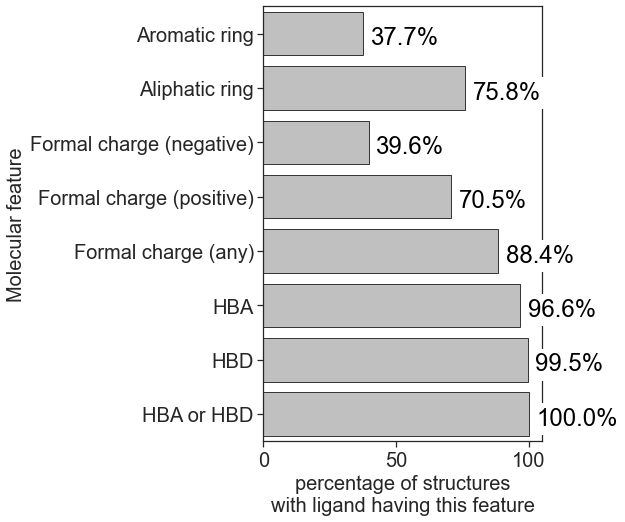

In [56]:
# let's plot!

fig_dims = (5, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x="proc",
            y=distanceAndDescriptorsBoolGroupStats.index,
            data=distanceAndDescriptorsBoolGroupStats,
            color='silver',
            edgecolor="black",
            linewidth=0.75,
            order=[
                'Aromatic ring', 'Aliphatic ring', 'Formal charge (negative)',
                'Formal charge (positive)', 'Formal charge (any)', 'HBA',
                'HBD', 'HBA or HBD'
            ])

ax.set_ylabel('Molecular feature')
ax.set_xlabel('percentage of structures\nwith ligand having this feature')
show_values_on_barsProc(ax, "h", space=2.9, ycorrection=-0.2)

plt.savefig(imgSubDir + "total_no_of_molecular_features.png", dpi=600, bbox_inches="tight")

## number of structures with a given descriptor value

Number of structures with a given molecular feature, forming interactions
- SUM = no of a given interactions in this group
- COUNT = group size

In [57]:
colOrder = [ 'no of complexes',
 '% of structures having this feature',
 'interactions in this group',
 '% of structures having this feature and forming interaction']

colDict = {'sum': 'interactions in this group', 'count':'no of complexes'}

In [58]:
# Pi stacking
 
interactionsWeWantToShow = [
    'NumAromaticRings', 'Pi-stacking',
]

stats = distanceAndDescriptorsBoolGroup[interactionsWeWantToShow].groupby(
    "NumAromaticRings").agg(['sum', 'count'])['Pi-stacking']

stats['% of structures having this feature'] = stats['count']/pdbStructures
stats['% of structures having this feature and forming interaction'] = stats['sum'] / stats['count']


stats.rename(columns=colDict, inplace=True)

stats = stats[colOrder]

stats

,no of complexes,% of structures having this feature,interactions in this group,% of structures having this feature and forming interaction
NumAromaticRings,,,,
0,129,0.623188,0,0.000000
1,78,0.376812,62,0.794872


In [59]:
# Hydrogen bonds

interactionsWeWantToShow = [
    'Hydrogen bond', 'NumHBA', 'NumHBD', 'NumHBA+D',
]

stats = distanceAndDescriptorsBoolGroup[interactionsWeWantToShow].groupby(
    ["NumHBA", "NumHBD"]).agg(['sum', 'count'])['Hydrogen bond']

stats['% of structures having this feature'] = stats['count']/pdbStructures
stats['% of structures having this feature and forming interaction'] = stats['sum'] / stats['count']

stats.rename(columns=colDict, inplace=True)
stats = stats[colOrder]

stats

no of complexes  % of structures having this feature  \
NumHBA NumHBD                                                         
0      1                     7                             0.033816   
1      0                     1                             0.004831   
       1                   199                             0.961353   

               interactions in this group  \
NumHBA NumHBD                               
0      1                                7   
1      0                                0   
       1                              199   

               % of structures having this feature and forming interaction  
NumHBA NumHBD                                                               
0      1                                                     1.0            
1      0                                                     0.0            
       1                                                     1.0

In [60]:
# Bonds with charges
# , 'Formal Charge (pos)', 'Formal Charge (neg)', 'Pi-anion', 'Pi-cation', 

interactionsWeWantToShow = [
    'Cation-anion', 'Has charges',
]

stats = distanceAndDescriptorsBoolGroup[interactionsWeWantToShow].groupby(
    ['Has charges']).agg(['sum', 'count'])['Cation-anion']

stats['% of structures having this feature'] = stats['count']/pdbStructures
stats['% of structures having this feature and forming interaction'] = stats['sum'] / stats['count']

stats.rename(columns=colDict, inplace=True)
stats = stats[colOrder]

stats

,no of complexes,% of structures having this feature,interactions in this group,% of structures having this feature and forming interaction
Has charges,,,,
0,24,0.115942,0,0.000000
1,183,0.884058,127,0.693989


In [61]:
### the one single structure without h-bonds:

distanceData4pivot[distanceData4pivot['Hydrogen bond'] == 0]

# 1Q8N - indeed, only pi-stacking and lipophilic

Interaction,Cation-anion,Halogen bond,Hydrogen bond,Ion-mediated (K ion): ion-RNA,Ion-mediated (K ion): ligand-ion,Ion-mediated (MG ion): ion-RNA,Ion-mediated (MN ion): ion-RNA,Ion-mediated (Mg ion): ligand-ion,Ion-mediated (PB ion): ion-RNA,Ion-mediated (SR ion): ion-RNA,Lipophilic,Pi-anion,Pi-cation,Pi-stacking,Water-mediated: ligand-water,Water-mediated: water-RNA
PDB,,,,,,,,,,,,,,,,
1Q8N,0,0,0,0,0,0,0,0,0,0,100,0,0,6,0,0


# Generate script for PyMOL to visualize these data